<a href="https://colab.research.google.com/github/Gabs19/MD-Avaliacao-I/blob/main/Classifica%C3%A7%C3%A3o_Minera%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#__Data Exploration__

In [ ]:
import missingno as msno
import seaborn  as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projeto de Rodrigo (Mineração de Dados)/waterQuality.csv")

In [ ]:
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [ ]:
#O método .describe() do objecto pandas DataFrame nós fornece descrição da base. Através dele, podemos visualizar algumas métricas, como: percentils, média e desvio padrão
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


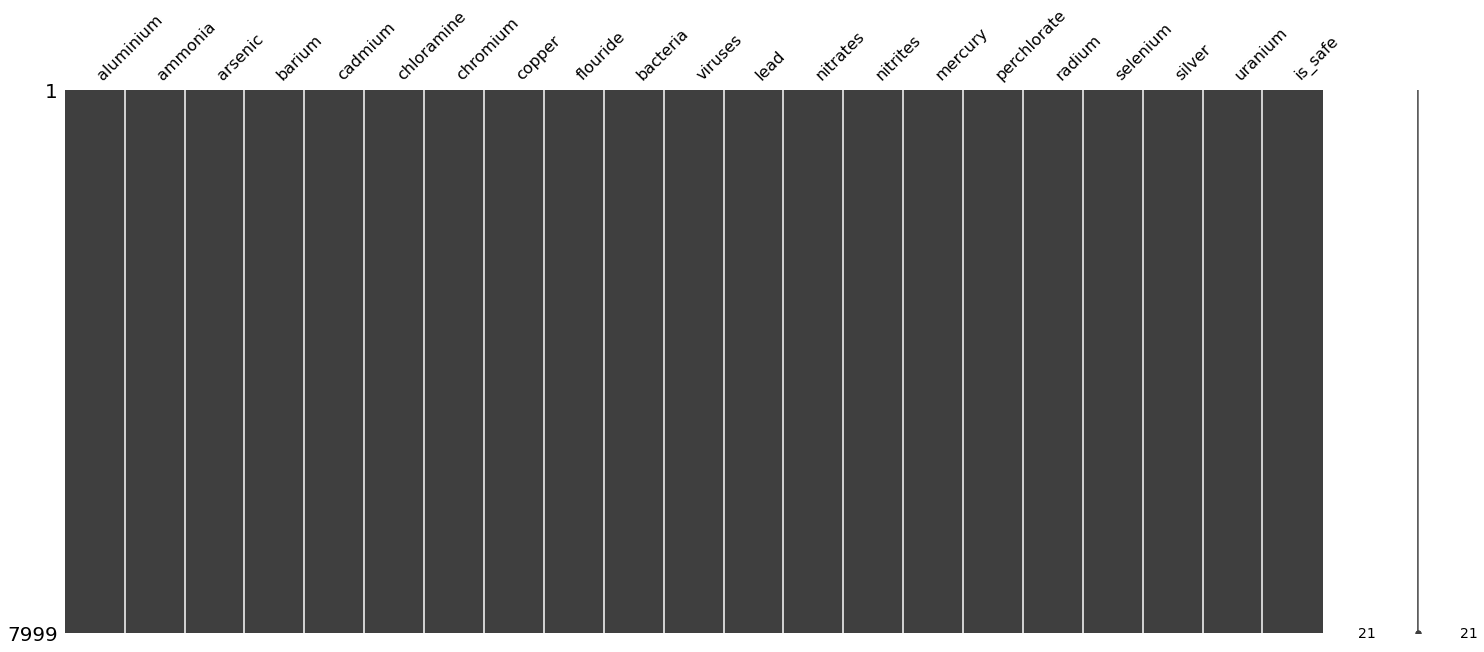

In [ ]:
# Verifica se há dados nulos presentes em cada uma das colunas
msno.matrix(df)

In [ ]:
# Verifica se há registros duplicados
df[df.duplicated()]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe


Através do gráfico boxplot, podemos visualizar a distribuição quantitativa dos danos. O gráfico boxplot é muito utilizado na detecção de outliers

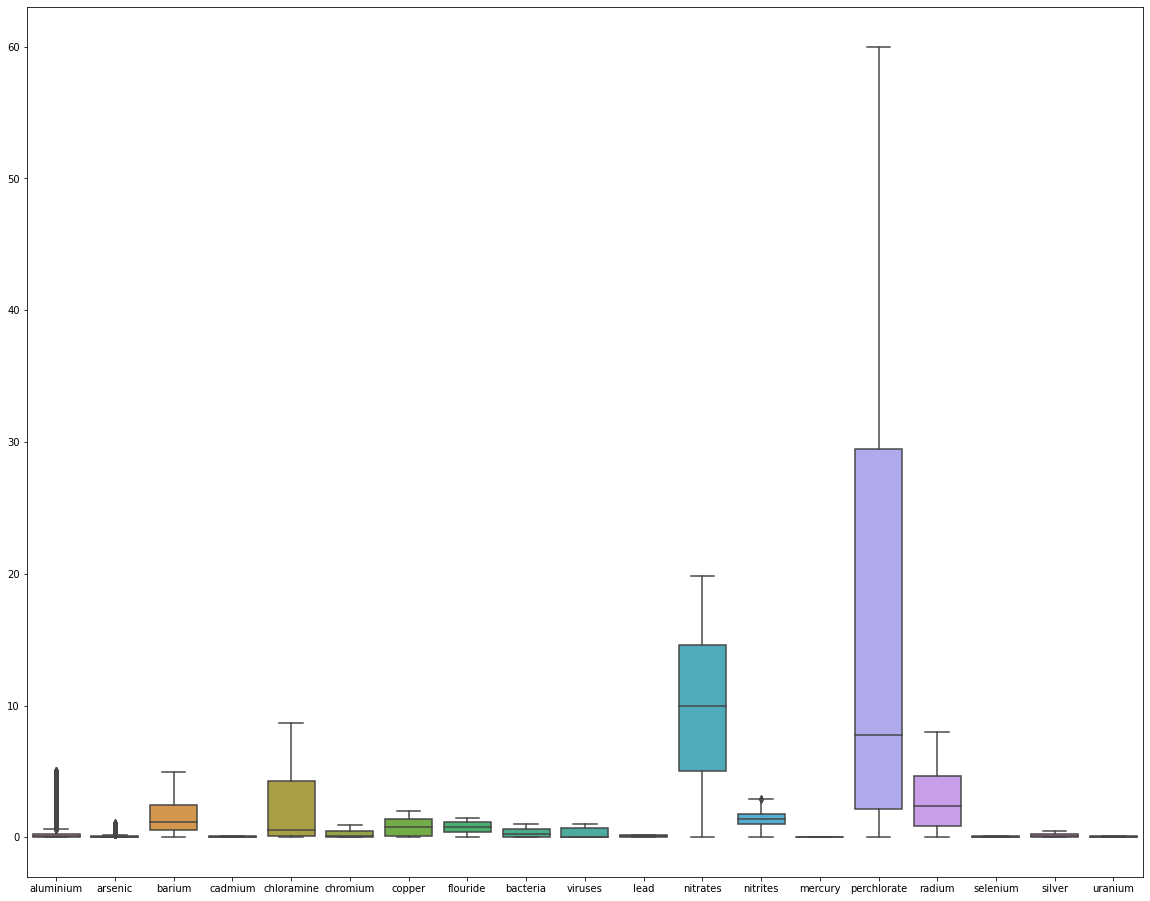

In [ ]:
fig, ax = plt.subplots(figsize = (20, 16))
sns.boxplot(data=df)

Através do gráfico de correlação podemos ver a relação entre os atributos. Podemos perceber que os atributos bacterias e virus possuem uma alta correalação.

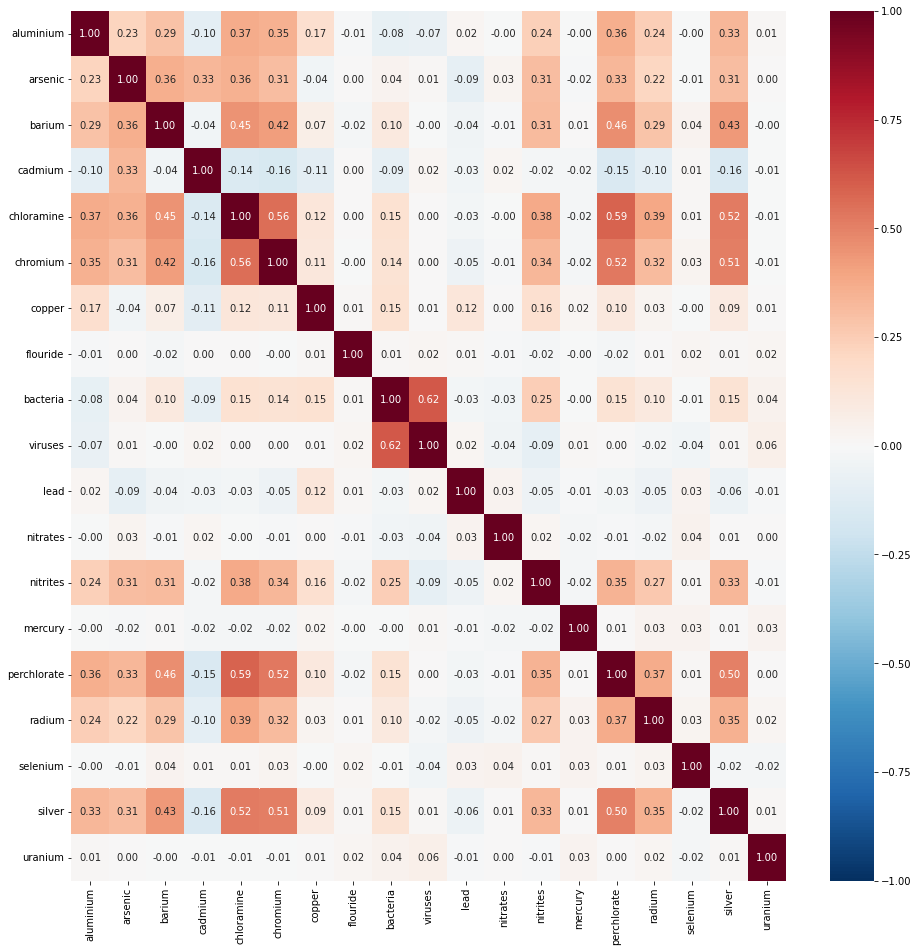

In [ ]:
fig, ax = plt.subplots(figsize = (16,16))
ax = sns.heatmap(df.corr(), fmt = ".2f", annot =  True, ax = ax, cmap = "RdBu_r", vmin = -1, vmax = 1)

In [ ]:
#!pip install pandas-profiling==2.7.1

#import pandas_profiling
#pandas_profiling.ProfileReport(df)

#__Preprocessing__


Remove as entradas em que o atributo is_safe está corrompido

In [ ]:
df[df.is_safe == '#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,0.0,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,0.0,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,0.0,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [ ]:
df = df[df.is_safe != '#NUM!']
df[df.is_safe == '#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe


###__Corrigir Tipos das Colunas__

Converte a coluna is_safe para valores de valores to tipo string para int

In [ ]:
df.is_safe = pd.to_numeric(df.is_safe)
df.is_safe.dtype

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('int64')

Converte a coluna is_safe para valores de valores to tipo string para int

In [ ]:
df.ammonia = pd.to_numeric(df.ammonia)
df.ammonia.dtype

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('float64')

###__Remoção de Outliers__

Através do gráfico boxplor podemod perceber que os atributos arsenic, aluminium e nitrites possuem valores outliers

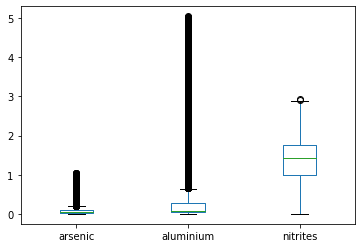

In [ ]:
df[['arsenic', 'aluminium', 'nitrites']].plot.box()

In [ ]:
def clip_outliers(array):
    '''Função criada para limitar os valores outliers de acordo com os limites inferiores e superiores'''
    q1 = np.percentile(array, 25)
    q3 = np.percentile(array, 75)

    limit = 1.5 * (q1 - q3) # iiq
    upper_limit = q1 - limit
    lower_limit = q3 + limit

    cliped_data = np.clip(array, lower_limit, upper_limit)
    return cliped_data

In [ ]:
df.arsenic = clip_outliers(df.arsenic)
df.aluminium = clip_outliers(df.aluminium)
df.nitrites = clip_outliers(df.nitrites)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Após a execução da função clip_outliers nas colunas com dados outliers, podemos visualizar que esses dados foram limitados aos limites superiores e inferiores do gráfico

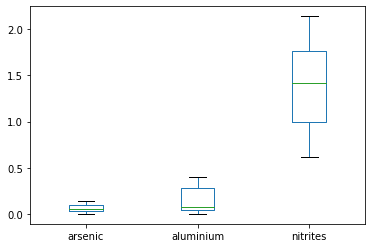

In [ ]:
df[['arsenic', 'aluminium', 'nitrites']].plot.box()

#__Train and Evaluation__

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.
from sklearn.utils import resample
from sklearn.metrics import precision_score, accuracy_score, recall_score, plot_confusion_matrix, classification_report

In [ ]:
features = df.iloc[:, :-1].to_numpy()
labels = df.iloc[:, -1].to_numpy()

In [ ]:
stratified_shuffle_train_test_split = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

In [ ]:
def train(model, model_params):
    for n_split, (train_idx, test_idx) in enumerate(stratified_shuffle_train_test_split.split(features, labels)):
        classifier = model(**model_params)

        # Train
        train_data = features[train_idx]
        train_labels = labels[train_idx]

        class_0_positions = np.argwhere(train_labels == 0).flatten()
        class_1_positions = np.argwhere(train_labels == 1).flatten()

        class_0_train_data = train_data[class_0_positions]
        class_1_train_data = train_data[class_1_positions]

        '''
        # Downsampling
        new_class_0_train_data = resample(class_0_train_data, replace=False, n_samples=len(class_1_positions))
        
        new_train_data = np.vstack((new_class_0_train_data, class_1_train_data))
        new_train_labels = np.append(np.full(len(new_class_0_train_data), 0), np.full(len(class_1_train_data), 1))
        '''
        
        # Upsampling
        new_class_1_train_data = resample(class_1_train_data, replace=True, n_samples=len(class_0_positions))

        new_train_data = np.vstack((new_class_1_train_data, class_0_train_data))
        new_train_labels = np.append(np.full(len(new_class_1_train_data), 1), np.full(len(class_0_train_data), 0))

        classifier.fit(new_train_data, new_train_labels)
        
        # Evaluation
        test_data = features[test_idx]
        test_labels = labels[test_idx]

        predicted_labels = classifier.predict(test_data)

        print('Split:', n_split)
        print('Precision:', precision_score(test_labels, predicted_labels))
        print('Accuracy:', accuracy_score(test_labels, predicted_labels))
        print('Recall:', recall_score(test_labels, predicted_labels))
        print('-------------------------------------')

    return classifier

In [ ]:
decision_tree_classifier = train(model=DecisionTreeClassifier, model_params={'random_state': 42})

Split: 0
Precision: 0.8185185185185185
Accuracy: 0.9574822842851188
Recall: 0.8065693430656934
-------------------------------------
Split: 1
Precision: 0.8237547892720306
Accuracy: 0.9562317632346811
Recall: 0.7846715328467153
-------------------------------------
Split: 2
Precision: 0.825925925925926
Accuracy: 0.9591496456857024
Recall: 0.8138686131386861
-------------------------------------
Split: 3
Precision: 0.7992424242424242
Accuracy: 0.9516465193830763
Recall: 0.7700729927007299
-------------------------------------
Split: 4
Precision: 0.8127208480565371
Accuracy: 0.9595664860358483
Recall: 0.8394160583941606
-------------------------------------


In [ ]:
random_forest_classifier = train(model=RandomForestClassifier, model_params={'random_state': 42})

Split: 0
Precision: 0.8685258964143426
Accuracy: 0.9629012088370155
Recall: 0.7956204379562044
-------------------------------------
Split: 1
Precision: 0.8553719008264463
Accuracy: 0.9574822842851188
Recall: 0.7554744525547445
-------------------------------------
Split: 2
Precision: 0.857707509881423
Accuracy: 0.9612338474364318
Recall: 0.791970802919708
-------------------------------------
Split: 3
Precision: 0.8291666666666667
Accuracy: 0.9516465193830763
Recall: 0.7262773722627737
-------------------------------------
Split: 4
Precision: 0.8785425101214575
Accuracy: 0.9637348895373072
Recall: 0.791970802919708
-------------------------------------


In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(dt, 
                  feature_names=x,  
                  class_names=['0', '1'],  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
grap

NameError: ignored